## Loading various HK marathon datasets

In [1]:
import pandas as pd
import numpy as np
import pandas_profiling
import matplotlib.pyplot as plt 
import seaborn as sns
from mpl_toolkits.basemap import Basemap

In [166]:
challenge = pd.read_csv('challenge.csv')
run1 = pd.read_csv('run1.csv')

In [167]:
challenge.shape, run1.shape

((5616, 11), (7233, 11))

In [168]:
challenge.head()

,Overall Position,Gender Position,Category Position,Category,Race No,Country,Official Time,Net Time,10km Time,Half Way Time,30km Time
0,1,1,1,MMS,21080,Kenya,2:12:12,2:12:11,0:30:35,1:04:48,1:33:36
1,2,2,1,MMI,14,Kenya,2:12:14,2:12:13,0:30:34,1:04:48,1:33:36
2,3,3,2,MMI,2,Ethiopia,2:12:20,2:12:18,0:30:35,1:04:49,1:33:36
3,4,4,2,MMS,21077,Kenya,2:12:29,2:12:27,0:30:35,1:04:48,1:33:36
4,5,5,3,MMI,18,Ethiopia,2:12:47,2:12:46,0:30:34,1:04:48,1:33:36


In [169]:
run1.head()

,Overall Position,Gender Position,Category Position,Category,Race No,Country,Official Time,Net Time,10km Time,Half Way Time,30km Time
0,1,1,1,MR1,A0066,Ireland,2:51:05,2:51:02,0:38:50,1:23:15,1:59:44
1,2,2,2,MR1,A6190,Hong Kong SAR,2:54:04,2:53:57,0:39:35,1:24:09,2:00:24
2,3,3,3,MR1,A4491,China,2:58:34,2:57:28,0:40:53,1:27:03,2:04:02
3,4,4,4,MR1,A8955,China,3:03:34,3:03:28,0:42:52,1:30:34,2:08:36
4,5,5,5,MR1,A5879,China,3:04:50,3:04:49,0:40:42,1:27:31,2:06:08


In [170]:
marathon = pd.concat([challenge, run1])

In [171]:
marathon.shape

(12849, 11)

In [172]:
marathon.head()

,Overall Position,Gender Position,Category Position,Category,Race No,Country,Official Time,Net Time,10km Time,Half Way Time,30km Time
0,1,1,1,MMS,21080,Kenya,2:12:12,2:12:11,0:30:35,1:04:48,1:33:36
1,2,2,1,MMI,14,Kenya,2:12:14,2:12:13,0:30:34,1:04:48,1:33:36
2,3,3,2,MMI,2,Ethiopia,2:12:20,2:12:18,0:30:35,1:04:49,1:33:36
3,4,4,2,MMS,21077,Kenya,2:12:29,2:12:27,0:30:35,1:04:48,1:33:36
4,5,5,3,MMI,18,Ethiopia,2:12:47,2:12:46,0:30:34,1:04:48,1:33:36


In [173]:
marathon.describe()

,Overall Position,Gender Position,Category Position
count,12849.000000,12849.000000,12849.000000
mean,3263.635691,2387.207487,2365.840999
std,1940.138028,1706.480145,2149.985942
min,1.000000,1.000000,1.000000
25%,1607.000000,804.000000,576.000000
50%,3213.000000,2185.000000,1532.000000
75%,4819.000000,3791.000000,4021.000000
max,7238.000000,6084.000000,7238.000000


In [174]:
marathon.describe(include=object)

,Category,Race No,Country,Official Time,Net Time,10km Time,Half Way Time,30km Time
count,12849,12849,12849,12849,12849,12805,12817,12811
unique,9,12849,54,7220,7091,2560,4418,5735
top,MR1,A6240,Hong Kong SAR,4:58:51,5:21:52,1:05:20,2:11:09,3:22:41
freq,7233,1,8636,8,7,18,12,10


In [175]:
marathon['Category'].unique()

array(['MMS', 'MMI', 'MMM1', 'MFI', 'MFS', 'MMM2', 'MFM1', 'MFM2', 'MR1'],
      dtype=object)

In [176]:
marathon['Official Time'].head()

0    2:12:12
1    2:12:14
2    2:12:20
3    2:12:29
4    2:12:47
Name: Official Time, dtype: object

In [177]:
marathon['Official Time'] = pd.to_datetime(marathon['Official Time'])
marathon['10km Time'] = pd.to_datetime(marathon['10km Time'])
marathon['Half Way Time'] = pd.to_datetime(marathon['Half Way Time'])
marathon['30km Time'] = pd.to_datetime(marathon['30km Time'])

In [178]:
marathon.dtypes

Overall Position              int64
Gender Position               int64
Category Position             int64
Category                     object
Race No                      object
Country                      object
Official Time        datetime64[ns]
Net Time                     object
10km Time            datetime64[ns]
Half Way Time        datetime64[ns]
30km Time            datetime64[ns]
dtype: object

In [179]:
def convertSeconds(h,m,s): 
    minutes = m + (h * 60)
    seconds = s + (minutes * 60) 
    return int(seconds)

In [187]:
marathon['Official Seconds'] = np.vectorize(convertSeconds)(marathon['Official Time'].dt.hour, marathon['Official Time'].dt.minute, marathon['Official Time'].dt.second)


In [183]:
marathon = marathon.dropna()

In [185]:
marathon['10km Seconds'] = np.vectorize(convertSeconds)(marathon['10km Time'].dt.hour, marathon['10km Time'].dt.minute, marathon['10km Time'].dt.second)
marathon['Half Way Seconds'] = np.vectorize(convertSeconds)(marathon['Half Way Time'].dt.hour, marathon['Half Way Time'].dt.minute, marathon['Half Way Time'].dt.second)
marathon['30km Seconds'] = np.vectorize(convertSeconds)(marathon['30km Time'].dt.hour, marathon['30km Time'].dt.minute, marathon['30km Time'].dt.second)


In [190]:
marathon = marathon.drop(columns=['Official Time', '10km Time', 'Half Way Time', '30km Time'])

In [ ]:
#Rename columns 


In [191]:
marathon.head()

,Overall Position,Gender Position,Category Position,Category,Race No,Country,Net Time,10km Seconds,Half Way Seconds,30km Seconds,Official Seconds
0,1,1,1,MMS,21080,Kenya,2:12:11,1835,3888,5616,7932
1,2,2,1,MMI,14,Kenya,2:12:13,1834,3888,5616,7934
2,3,3,2,MMI,2,Ethiopia,2:12:18,1835,3889,5616,7940
3,4,4,2,MMS,21077,Kenya,2:12:27,1835,3888,5616,7949
4,5,5,3,MMI,18,Ethiopia,2:12:46,1834,3888,5616,7967


In [123]:
time_bins = pd.cut(marathon['Official Seconds'], 200, precision=1)

In [199]:
challenge = marathon[marathon['Category'] != 'MR1']

In [201]:
challenge.shape

(5586, 11)

## Visualize data

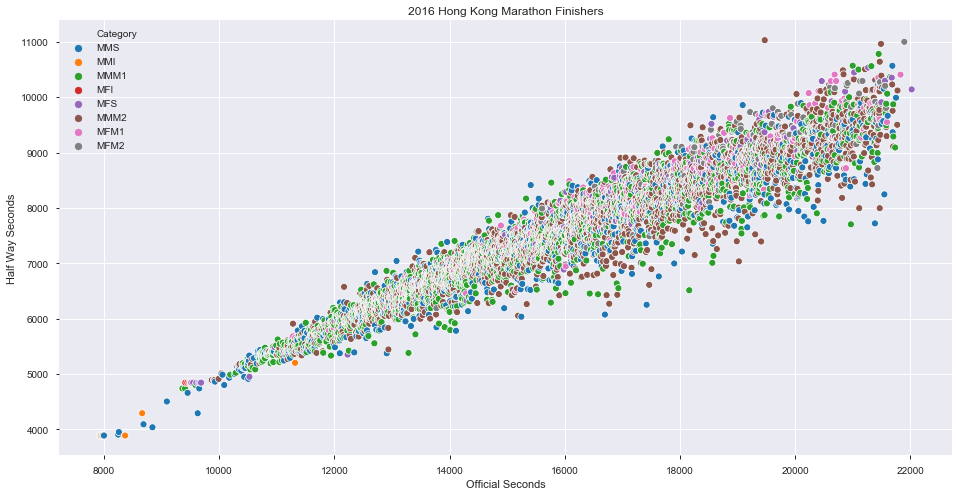

In [432]:
fig, ax = plt.subplots(figsize=(16,8))
sns.scatterplot(x='Official Seconds', y='Half Way Seconds', hue='Category', data=challenge, ax=ax)
plt.title('2016 Hong Kong Marathon Finishers');

In [427]:
men_elite = challenge.loc[(challenge['Official Seconds'] < 10800) & (challenge['Category'].isin(['MMS','MMI','MMM1','MMM2']))]
women_elite = challenge.loc[(challenge['Official Seconds'] < 10800) & (challenge['Category'].isin(['MFI','MFS','MFM1','MFM2']))]



In [428]:
men_elite.shape

(102, 11)

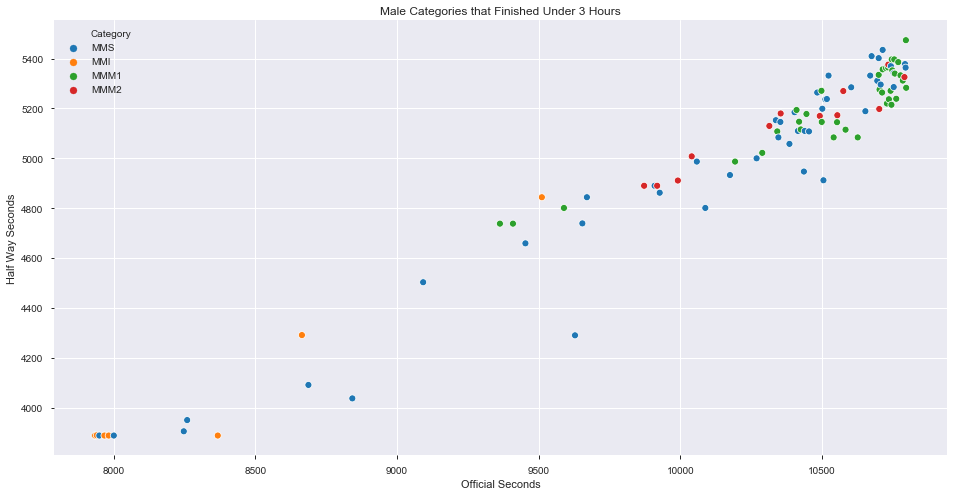

In [429]:
fig, ax = plt.subplots(figsize=(16,8))
sns.scatterplot(x='Official Seconds', y='Half Way Seconds', hue='Category', data=men_elite, ax=ax)
plt.title("Male Categories that Finished Under 3 Hours");

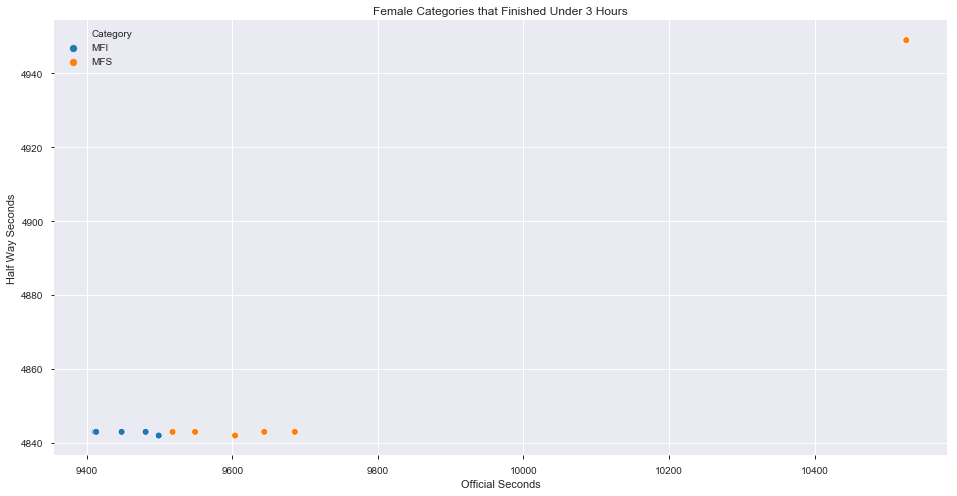

In [430]:
fig, ax = plt.subplots(figsize=(16,8))
sns.scatterplot(x='Official Seconds', y='Half Way Seconds', hue='Category', data=women_elite, ax=ax)
plt.title("Female Categories that Finished Under 3 Hours");

In [208]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(challenge, random_state=42)
train, val = train_test_split(train, random_state=42)

In [209]:
train.shape, val.shape, test.shape

((3141, 11), (1048, 11), (1397, 11))

In [210]:
train.columns.tolist()

['Overall Position',
 'Gender Position',
 'Category Position',
 'Category',
 'Race No',
 'Country ',
 'Net Time',
 '10km Seconds',
 'Half Way Seconds',
 '30km Seconds',
 'Official Seconds']

## Rename columns for .plot_tree bug (no whitespace)

In [333]:
train = train.rename(columns={"Country ": "Country", 
                              "Gender Position":"general_position",
                              "Category Position":"category_position",
                              "Race No":"race_no",
                              "Net Time":"net_time",
                              "10km Seconds":"10km_seconds",
                              "Half Way Seconds":"half_way_seconds",
                              "30km Seconds":"30km_seconds",
                              "Official Seconds":"official_seconds"
                             })
val = val.rename(columns={"Country ": "Country", 
                              "Gender Position":"general_position",
                              "Category Position":"category_position",
                              "Race No":"race_no",
                              "Net Time":"net_time",
                              "10km Seconds":"10km_seconds",
                              "Half Way Seconds":"half_way_seconds",
                              "30km Seconds":"30km_seconds",
                              "Official Seconds":"official_seconds"
                             })
test = test.rename(columns={"Country ": "Country", 
                              "Gender Position":"general_position",
                              "Category Position":"category_position",
                              "Race No":"race_no",
                              "Net Time":"net_time",
                              "10km Seconds":"10km_seconds",
                              "Half Way Seconds":"half_way_seconds",
                              "30km Seconds":"30km_seconds",
                              "Official Seconds":"official_seconds"
                             })

## Arrange data

In [370]:
features = ['Country', '10km_seconds', '30km_seconds','half_way_seconds', 'official_seconds']
target = 'Category'

X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]
y_test = test[target]

In [371]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((3141, 5), (3141,), (1048, 5), (1048,), (1397, 5), (1397,))

## Create pipeline and fit model 

In [372]:
%%time 
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
import category_encoders as ce

#make pipeline
pipeline = Pipeline([
    ('encoder', ce.OneHotEncoder()), 
    ('model', XGBClassifier(n_estimators=100, n_jobs=-1))
])
#fit on train
pipeline.fit(X_train, y_train)

CPU times: user 5.29 s, sys: 18.3 ms, total: 5.31 s
Wall time: 5.34 s


## Predict on validation set

In [373]:
# make predictions for validation set
y_pred = pipeline.predict(X_val)
predictions = [value for value in y_pred]

In [374]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_val, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 41.51%


## Test set

In [375]:
y_pred = pipeline.predict(X_test)
predictions = [value for value in y_pred]

In [376]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 40.94%


## Feature Importance

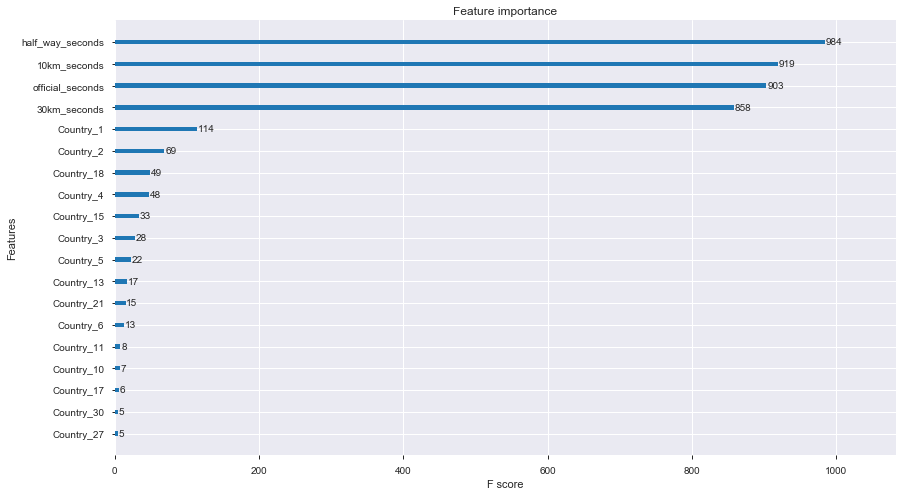

In [377]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

# plot feature importance
fig, ax = plt.subplots(figsize=(14,8))
plot_importance(pipeline.named_steps['model'], ax=ax);

## Visualizing Decisions 

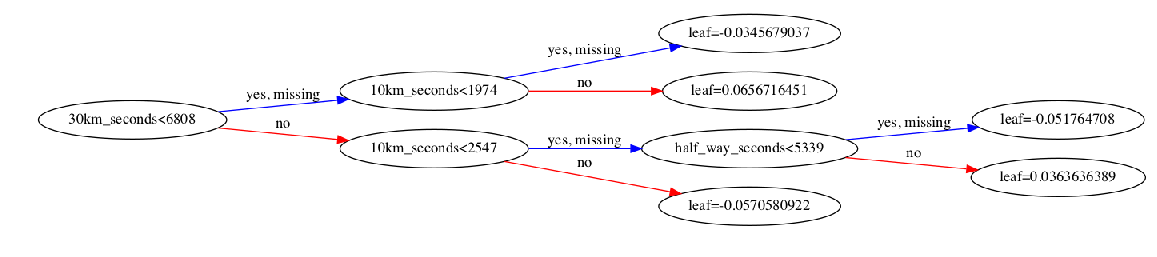

In [378]:
fig,ax = plt.subplots(figsize=(20,20))
plot_tree(pipeline.named_steps['model'],num_trees=0,rankdir='LR',ax=ax);

## Splitting Gender Out

In [379]:
features = ['Country', '10km_seconds', '30km_seconds','half_way_seconds', 'official_seconds']
target = 'Category'

train_m = train[train['Category'].isin(['MMS', 'MMI', 'MMM1', 'MMM2'])]
val_m = val[val['Category'].isin(['MMS', 'MMI', 'MMM1', 'MMM2'])]
test_m = test[test['Category'].isin(['MMS', 'MMI', 'MMM1', 'MMM2'])]

## Arrange data for Male Finishers

In [380]:
X_train = train_m[features]
y_train = train_m[target]
X_val = val_m[features]
y_val = val_m[target]
X_test = test_m[features]
y_test = test_m[target]

In [381]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((2630, 5), (2630,), (870, 5), (870,), (1187, 5), (1187,))

## Create pipeline and fit model

In [382]:
%%time 
#make pipeline
pipeline = Pipeline([
    ('encoder', ce.OneHotEncoder()), 
    ('model', XGBClassifier(n_estimators=100, n_jobs=-1))
])
#fit on train
pipeline.fit(X_train, y_train)

CPU times: user 2.09 s, sys: 11.1 ms, total: 2.1 s
Wall time: 2.11 s


## Predict on validation set

In [383]:
y_pred = pipeline.predict(X_val)
predictions = [value for value in y_pred]

In [384]:
accuracy = accuracy_score(y_val, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 50.23%


## Test set

In [385]:
y_pred = pipeline.predict(X_test)
predictions = [value for value in y_pred]

In [386]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 48.78%


## Feature Importance

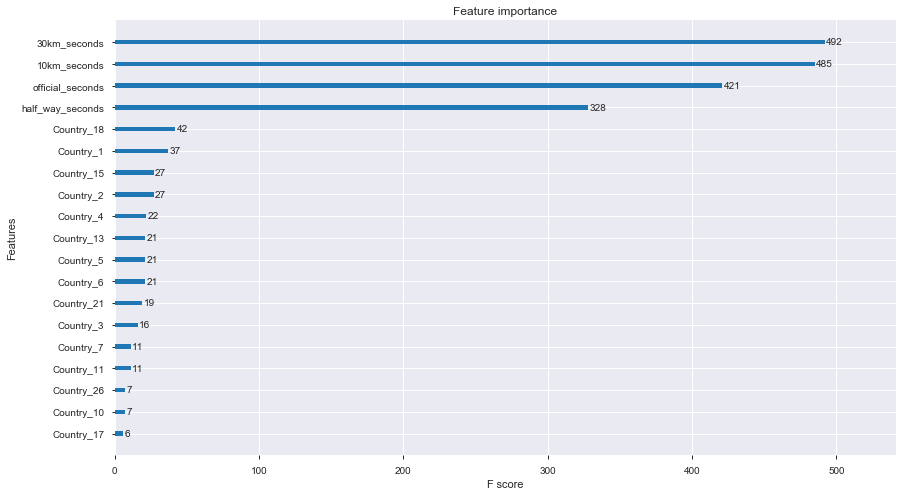

In [387]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

# plot feature importance
fig, ax = plt.subplots(figsize=(14,8))
plot_importance(pipeline.named_steps['model'], ax=ax);

## Visualizing Decisions 

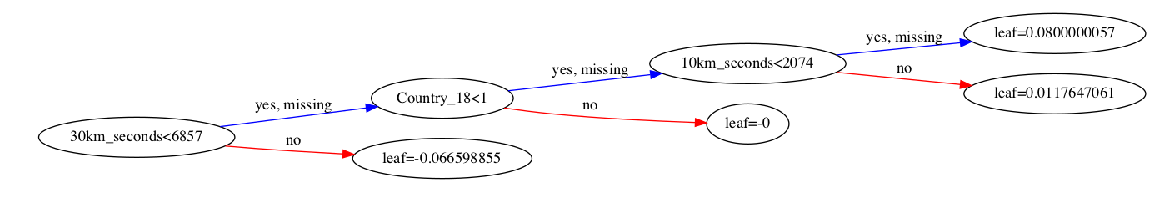

In [431]:
fig,ax = plt.subplots(figsize=(20,20))
plot_tree(pipeline.named_steps['model'],num_trees=0,rankdir='LR',ax=ax);